# optimisation de la composition d'un portefeuille de stocks


<p align="center">Réalisé par Maria Aboulaala</p>

____________________________________________________________________________________________________________________________________________

### Importation des bibliothèques nécessaires


In [42]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 
import datetime as dt 
# import time
# import os
# from os import listdir
# from os.path import isfile, join
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import yfinance as yf
import pandas as pd


## Importation des donnees de yahoo
Ce projet implique la collecte de données financières à partir de Yahoo Finance pour un ensemble d'action'. Les symboles des actions inclus dans l'ensemble sont : ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI", "NEM", "AMT", "HES"].

Les données financières ont été collectées pour la période allant du 1er janvier 2018 au 1er janvier 2023, en utilisant les cours de clôture ajustés ("Adj Close") des actions. Cette plage de dates a été sélectionnée pour analyser les performances sur une période significative, permettant ainsi d'évaluer les tendances et les mouvements des prix sur plusieurs années.

In [43]:

tickers = ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI", "NEM", "AMT", "HES"]
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")["Adj Close"]
mult_df = pd.DataFrame(data)

[*********************100%%**********************]  11 of 11 completed


### Graphique de la Croissance des Investissements sur l'Ensemble des Données

<Axes: xlabel='Date'>

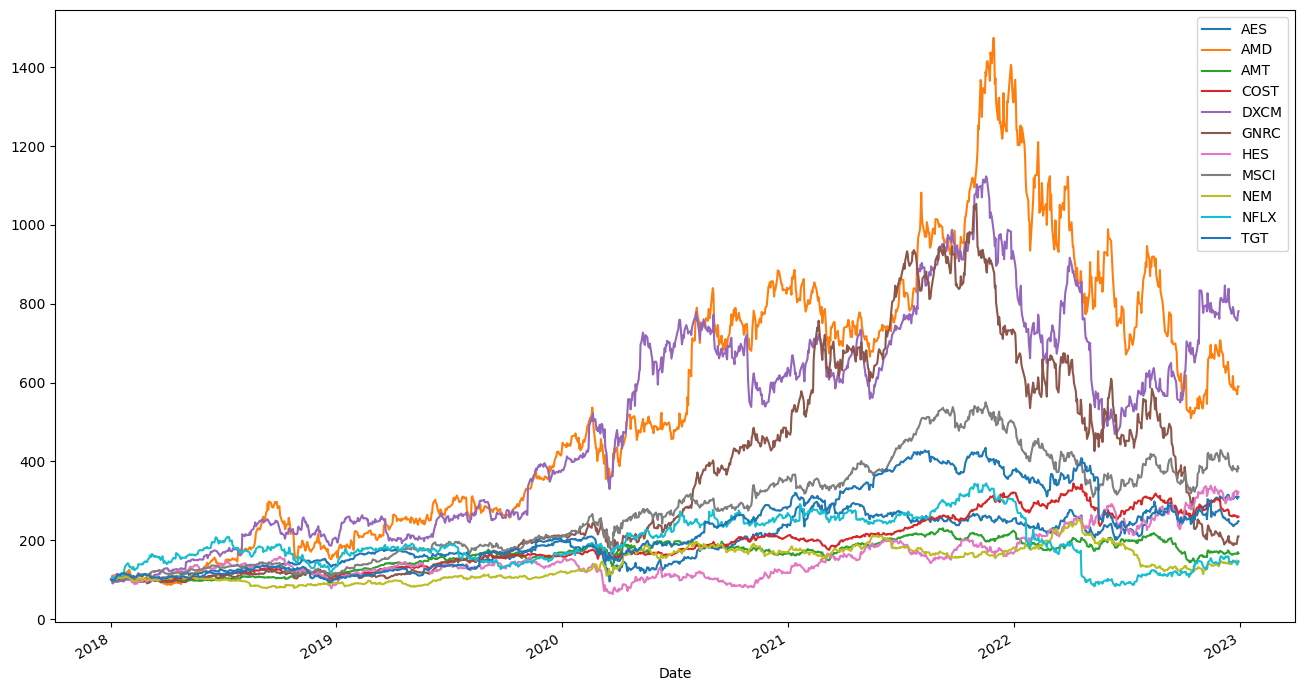

In [5]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))


### Les rendements moyens annualisés 

In [44]:
import numpy as np
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 jours de trading en moyenne par an
mean_ret

AES     0.226505
AMD     0.355518
AMT     0.102146
COST    0.191152
DXCM    0.411760
GNRC    0.148220
HES     0.234307
MSCI    0.268753
NEM     0.072737
NFLX    0.076705
TGT     0.182083
dtype: float64

### Covarience

In [8]:
returns.cov() * 252

,AES,AMD,AMT,COST,DXCM,GNRC,HES,MSCI,NEM,NFLX,TGT
AES,0.133555,0.065354,0.044492,0.030886,0.053665,0.074197,0.081174,0.064301,0.024669,0.040805,0.041720
AMD,0.065354,0.319952,0.048831,0.058520,0.107990,0.119921,0.083413,0.108331,0.032765,0.122877,0.071525
AMT,0.044492,0.048831,0.082052,0.031969,0.042358,0.053611,0.033637,0.052953,0.023025,0.032324,0.032321
COST,0.030886,0.058520,0.031969,0.059282,0.040131,0.048655,0.024198,0.044099,0.013482,0.045474,0.046735
DXCM,0.053665,0.107990,0.042358,0.040131,0.241631,0.082263,0.050181,0.092546,0.020908,0.083026,0.044684
GNRC,0.074197,0.119921,0.053611,0.048655,0.082263,0.228702,0.073215,0.086762,0.029884,0.078886,0.064198
HES,0.081174,0.083413,0.033637,0.024198,0.050181,0.073215,0.268960,0.061458,0.031909,0.044750,0.042037
MSCI,0.064301,0.108331,0.052953,0.044099,0.092546,0.086762,0.061458,0.127532,0.026207,0.078057,0.045062
NEM,0.024669,0.032765,0.023025,0.013482,0.020908,0.029884,0.031909,0.026207,0.112778,0.017402,0.012325
NFLX,0.040805,0.122877,0.032324,0.045474,0.083026,0.078886,0.044750,0.078057,0.017402,0.241519,0.047884


### Correlation

In [9]:
returns.corr()


,AES,AMD,AMT,COST,DXCM,GNRC,HES,MSCI,NEM,NFLX,TGT
AES,1.000000,0.316154,0.425015,0.347107,0.298733,0.424542,0.428295,0.492691,0.201003,0.227196,0.326250
AMD,0.316154,1.000000,0.301378,0.424913,0.388386,0.443320,0.284346,0.536291,0.172488,0.442031,0.361370
AMT,0.425015,0.301378,1.000000,0.458369,0.300826,0.391360,0.226426,0.517648,0.239354,0.229618,0.322464
COST,0.347107,0.424913,0.458369,1.000000,0.335303,0.417860,0.191638,0.507170,0.164891,0.380034,0.548554
DXCM,0.298733,0.388386,0.300826,0.335303,1.000000,0.349938,0.196844,0.527196,0.126652,0.343684,0.259786
GNRC,0.424542,0.443320,0.391360,0.417860,0.349938,1.000000,0.295202,0.508023,0.186078,0.335653,0.383640
HES,0.428295,0.284346,0.226426,0.191638,0.196844,0.295202,1.000000,0.331839,0.183214,0.175580,0.231649
MSCI,0.492691,0.536291,0.517648,0.507170,0.527196,0.508023,0.331839,1.000000,0.218518,0.444762,0.360609
NEM,0.201003,0.172488,0.239354,0.164891,0.126652,0.186078,0.183214,0.218518,1.000000,0.105443,0.104882
NFLX,0.227196,0.442031,0.229618,0.380034,0.343684,0.335653,0.175580,0.444762,0.105443,1.000000,0.278453


### Analyse des Rendements et des Risques de 10 000 Combinaisons

In [16]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list

risk_free_rate = 0.0125 # Approximate 10 year bond rate
for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.16748937, 0.17108943, 0.21295038, ..., 0.22867984, 0.18457361,
        0.19250639]),
 array([0.23555303, 0.24941487, 0.26065785, ..., 0.25551475, 0.25587269,
        0.24230914]),
 array([0.6579808 , 0.63584593, 0.76901727, ..., 0.84605621, 0.67249695,
        0.74287906]),
 array([[0.10772033, 0.02101742, 0.18316386, ..., 0.12375038, 0.14029188,
         0.06265434],
        [0.02639821, 0.00223688, 0.08598475, ..., 0.08098089, 0.18292784,
         0.20750052],
        [0.08211712, 0.1578976 , 0.15654976, ..., 0.09231133, 0.08283412,
         0.08752047],
        ...,
        [0.24373122, 0.02695936, 0.03685607, ..., 0.10129935, 0.03774765,
         0.14848882],
        [0.0496261 , 0.0803393 , 0.12692699, ..., 0.13993715, 0.10767522,
         0.06308698],
        [0.19524746, 0.06981132, 0.07475633, ..., 0.09563225, 0.14075659,
         0.03864178]]))

### La Frontière Efficace

<Axes: xlabel='Volatility', ylabel='Return'>

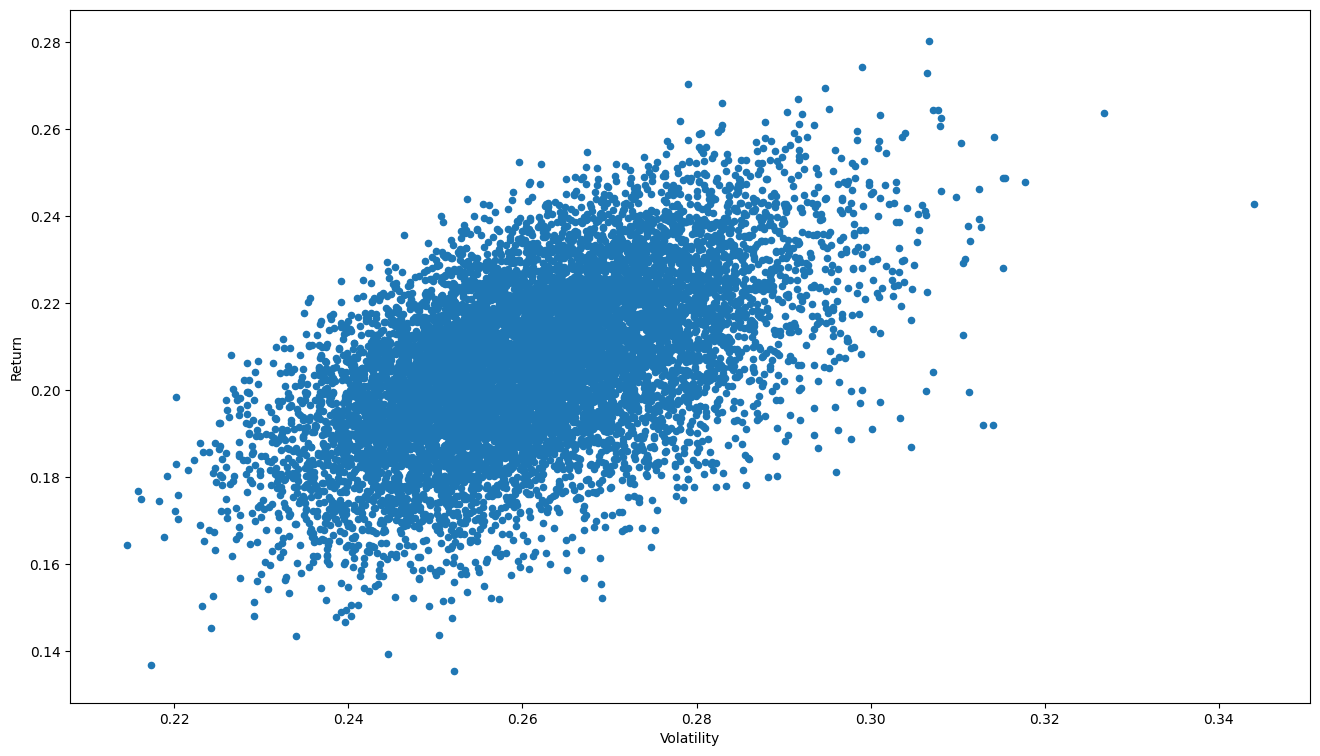

In [46]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

### Sharpe Ratio

In [19]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 11:
    print("Stock : %s : %2.2f" % (tickers[i], (p_wt[4296][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])
      
# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : GNRC : 11.61
Stock : DXCM : 6.22
Stock : AMD : 1.91
Stock : NFLX : 4.52
Stock : COST : 9.39
Stock : TGT : 13.39
Stock : AES : 24.02
Stock : MSCI : 0.10
Stock : NEM : 7.31
Stock : AMT : 21.42
Stock : HES : 0.11

Volatility : 0.2935054241796918
Return : 0.19601289763571647


Get Number of Shares & Cost Based on Weights

In [25]:
# I'm going to use a similar portfolio that has slightly easier percents to work with

# Calculated Weighting
# Stock : GNRC : 21.90 
# Stock : CPRT : 15.63 
# Stock : ODFL : 23.83
# Stock : AMD : 11.09
# Stock : PAYC : 1.86
# Stock : CHTR : 3.55
# Stock : MKC : 2.87
# Stock : PG : 1.09
# Stock : PGR : 2.86
# Stock : NEM : 10.11
# Stock : CCI : 4.34
# Stock : COG : 0.87

Get Portfolio Weighting

In [26]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

In [20]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

In [37]:
def get_port_val_by_date(date, shares, tickers):
    port_prices = mult_df
    # Convert from dataframe to Python list
    port_prices = port_df_start.values.tolist()
    # Trick that converts a list of lists into a single list
    port_prices = sum(port_prices, [])
    return port_prices

In [30]:
# def merge_df_by_column_name(col_name, sdate, edate, *tickers):
#     # Will hold data for all dataframes with the same column name
#     mult_df = pd.DataFrame()
    
#     for x in tickers:
#         df = get_df_from_csv(x)
#         mask = (df.index >= sdate) & (df.index <= edate)
#         mult_df[x] = df.loc[mask][col_name]
        
#     return mult_df

Returns the Value of Portfolio by Date

In [39]:
port_list = ["GNRC", "CPRT", "ODFL", "AMD", "PAYC", "CHTR", "MKC", 
             "PG", "PGR", "NEM", "CCI", "COG"]

port_wts = [22, 16, 24, 11, 2, 4, 3, 1, 3, 10, 4, 1]

# Get all stock prices on the starting date
port_df_start = mult_df.loc["2023-01-01"]
# Convert from dataframe to Python list
port_prices = port_df_start.values.tolist()
# Trick that converts a list of lists into a single list
port_prices = sum(port_prices, [])

# Calculated Weighting
# Stock : GNRC : 21.90 
# Stock : CPRT : 15.63 
# Stock : ODFL : 23.83
# Stock : AMD : 11.09
# Stock : PAYC : 1.86
# Stock : CHTR : 3.55
# Stock : MKC : 2.87
# Stock : PG : 1.09
# Stock : PGR : 2.86
# Stock : NEM : 10.11
# Stock : CCI : 4.34
# Stock : COG : 0.87

tot_shares, share_cost = get_port_shares(118.20, True, port_wts, port_prices)
print("Shares :", tot_shares)
print("Share Cost :", share_cost)

# Get list of weights for stocks
stock_wts = get_port_weighting(share_cost)
print("Stock Weights :", stock_wts)

# Get value at end of year
get_port_val_by_date('2020-12-31', tot_shares, port_list)

KeyError: '2023-01-01'

In [36]:
stock_wts = pd.DataFrame(stock_wts)
stock_wts

,0
0,0.225714
1,0.163962
2,0.236863
3,0.106230
4,0.020138
5,0.037529
6,0.030303
7,0.010475
8,0.030432
9,0.087283
